In [1]:
pip install powerlaw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 32.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import bmll2 as b2
import random
import math
import pandas as pd
import numpy as np
from pandas import StringDtype

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogFormatterSciNotation

from statsmodels.sandbox.stats.runs import runstest_1samp 
import powerlaw
import itertools
import pylab
import scipy.stats
from scipy.optimize import curve_fit

import shutil
from pathlib import Path
import warnings

In [3]:
identifier = 'power_50'

In [4]:
b2.get_file(f'test_data/alpha_gamma_df_{identifier}.csv')
alpha_gamma_df = pd.read_csv(f'alpha_gamma_df_{identifier}.csv')

In [5]:
alpha_estimate = alpha_gamma_df['alpha'].values - 1
gamma_estimate = alpha_gamma_df['gamma_nlls'].values

In [38]:
len(alpha_estimate)

267

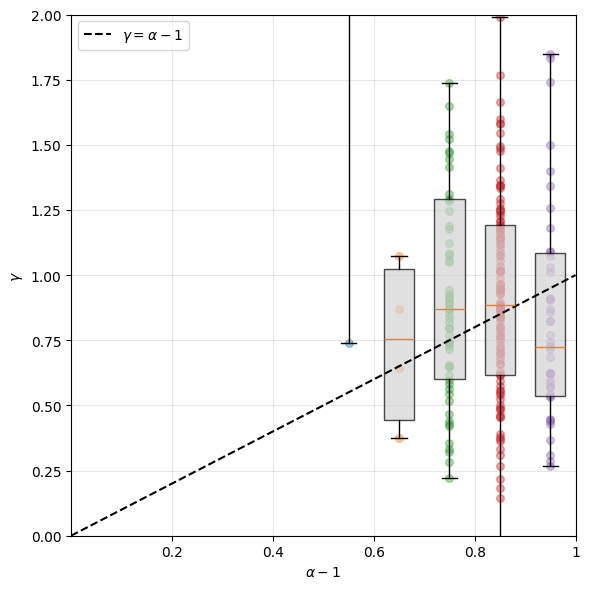

In [39]:
df        = pd.DataFrame({'alpha - 1' : alpha_estimate, 'gamma' : gamma_estimate})
bins      = np.linspace(0, 1, 11)
df['bin'] = pd.cut(df['alpha - 1'], bins = bins)

bin_intervals = df['bin'].cat.categories
bin_mids      = bin_intervals.mid

plt.figure(figsize = (6, 6))

# Draw boxplots bin-by-bin
for i, interval in enumerate(bin_intervals):
    gamma_vals = df.loc[df['bin'] == interval, 'gamma'].dropna()
    
    if len(gamma_vals) == 0:
        continue
    
    # Boxplot at the bin midpoint
    plt.boxplot(gamma_vals, positions = [bin_mids[i]], widths = 0.06, patch_artist = True, showfliers = False,
                boxprops = dict(facecolor = 'lightgray', alpha = 0.7))
    
    # Scatter (jittered)
    #x_jitter = bin_mids[i] + 0.015 * np.random.randn(len(gamma_vals))
    #plt.scatter(x_jitter, gamma_vals, alpha = 0.4, s = 20)
    plt.scatter(np.full(len(gamma_vals), bin_mids[i]), gamma_vals, alpha = 0.4, s = 30)

# Theoretical line
plt.plot([0, 1], [0, 1], 'k--', label = r'$\gamma = \alpha - 1$')
plt.xticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = ['0.2', '0.4', '0.6', '0.8', '1'])
plt.xlabel(r'$\alpha - 1$')
plt.ylabel(r'$\gamma$')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.grid(alpha = 0.3)
plt.legend()

plt.tight_layout()

plt.savefig(f'alpha_gamma_{identifier}.pdf')
b2.put_file(f'alpha_gamma_{identifier}.pdf', 'figures')
b2.get_file(f'figures/alpha_gamma_{identifier}.pdf')

plt.show()